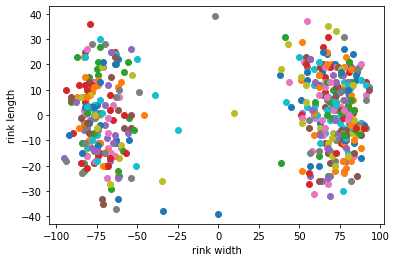

In [11]:
import json,pymysql,time
from flask import Flask
from flask import request,redirect
import matplotlib.pyplot as plt
import numpy as np

conn = pymysql.connect(host='mysql.clarksonmsda.org',port=3306,user='ia626',passwd='ia626clarkson', db='ia626', autocommit=True)
cur = conn.cursor(pymysql.cursors.DictCursor)
sql = '''SELECT s.arenaAdjustedXCord, s.arenaAdjustedYCord, s.event, p.name FROM geigersr_shots s, geigersr_players p
            WHERE s.shooterId = p.playerId AND p.name = %s AND s.season = %s;'''
name = "Connor McDavid"
season = 2022
tokens = [name, season]
cur.execute(sql,(tokens))
rows = []
for row in cur:
    d = {}
    d['xcord'] = row['arenaAdjustedXCord']
    d['ycord'] = row['arenaAdjustedYCord']
    d['event'] = row['event']
    d['name'] = row['name']
    rows.append(d)

for dict in rows:
    x = dict['xcord']
    y = dict['ycord']
    color = dict['event']
    plt.scatter(x,y)

plt.xlabel('rink width')
plt.ylabel('rink length')
plt.show()

